In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
     

In [2]:
shopping_data = pd.read_csv('shopping_trends_updated1.csv')

In [3]:
shopping_data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [4]:
shopping_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [ ]:
##1.What is the overall distribution of customer ages in the dataset?

In [8]:
age_distribution = shopping_data['Age'].describe()
age_distribution

count    3900.000000
mean       44.068462
std        15.207589
min        18.000000
25%        31.000000
50%        44.000000
75%        57.000000
max        70.000000
Name: Age, dtype: float64

In [ ]:
##2.How does the average purchase amount vary across different product categories?

In [9]:
avg_purchase_by_category = shopping_data.groupby('Category')['Purchase Amount (USD)'].mean()
avg_purchase_by_category

Category
Accessories    59.838710
Clothing       60.025331
Footwear       60.255426
Outerwear      57.172840
Name: Purchase Amount (USD), dtype: float64

In [ ]:
##3.Which gender has the highest number of purchases?

<Axes: xlabel='Gender', ylabel='Purchase Amount (USD)'>

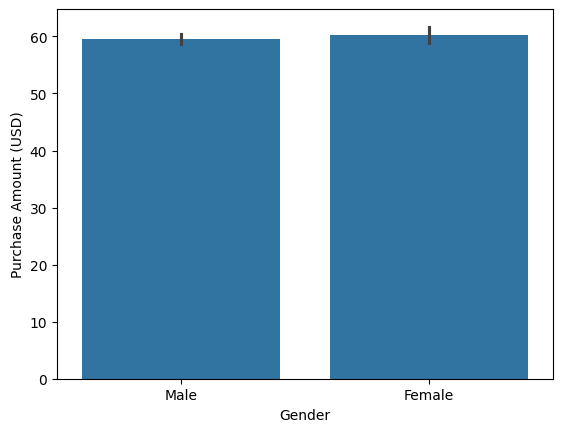

In [10]:
sns.barplot(shopping_data, x = 'Gender' , y = 'Purchase Amount (USD)')

In [ ]:
##4.What are the most commonly purchased items in each category?

In [11]:
common_items_per_category = shopping_data.groupby('Category')['Item Purchased'].value_counts().groupby(level=0).head(1)
common_items_per_category

Category     Item Purchased
Accessories  Jewelry           171
Clothing     Blouse            171
Footwear     Sandals           160
Outerwear    Jacket            163
Name: count, dtype: int64

In [12]:
fig = px.histogram(shopping_data , x = 'Item Purchased' , color = 'Category')
fig.show()

In [ ]:
##5.Are there any specific seasons or months where customer spending is significantly higher?

In [15]:
fig = px.histogram(shopping_data , x = 'Season' , range_y= [200 , 1500] )
fig.show()

In [ ]:
##6.What is the average rating given by customers for each product category?

In [16]:
avg_rating_per_category = shopping_data.groupby('Category')['Review Rating'].mean().reset_index()   
avg_rating_per_category

,Category,Review Rating
0,Accessories,3.768629
1,Clothing,3.723143
2,Footwear,3.790651
3,Outerwear,3.746914


In [17]:

fig = px.bar(avg_rating_per_category,x= 'Category' , y = 'Review Rating' )
fig.show()

In [ ]:
##7.Are there any notable differences in purchase behavior between subscribed and non-subscribed customers?

In [18]:
avg_purchase_subscribed = shopping_data.groupby('Subscription Status')['Purchase Amount (USD)'].mean()
avg_purchase_subscribed

Subscription Status
No     59.865121
Yes    59.491928
Name: Purchase Amount (USD), dtype: float64

<Axes: xlabel='Subscription Status', ylabel='Purchase Amount (USD)'>

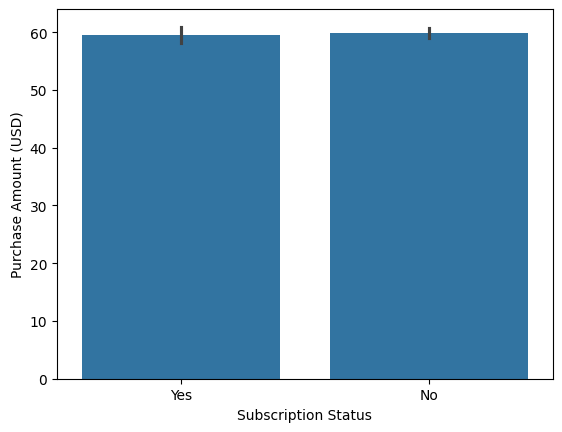

In [19]:
sns.barplot(shopping_data, x = 'Subscription Status' , y = 'Purchase Amount (USD)')

In [ ]:
##8.Which payment method is the most popular among customers?

In [20]:
shopping_data.groupby('Payment Method')['Purchase Amount (USD)'].mean().sort_values(ascending= False)

Payment Method
Debit Card       60.915094
Credit Card      60.074516
Bank Transfer    59.712418
Cash             59.704478
PayPal           59.245199
Venmo            58.949527
Name: Purchase Amount (USD), dtype: float64

<Axes: xlabel='Payment Method', ylabel='Purchase Amount (USD)'>

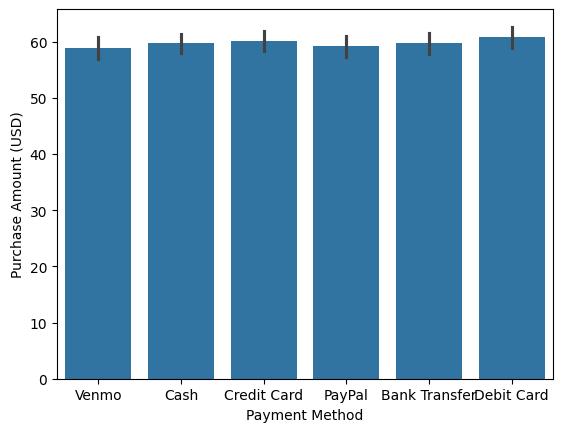

In [21]:
sns.barplot(shopping_data,x='Payment Method' , y = 'Purchase Amount (USD)')

In [ ]:
##9.Do customers who use promo codes tend to spend more than those who don't?

In [22]:
shop_groupby  = shopping_data.groupby('Promo Code Used')['Purchase Amount (USD)'].sum().reset_index()
shop_groupby

,Promo Code Used,Purchase Amount (USD)
0,No,133670
1,Yes,99411


In [23]:

fig  =  px.bar(shop_groupby , x= 'Promo Code Used' , y = 'Purchase Amount (USD)')
fig.show()

In [ ]:
##10.How does the frequency of purchases vary across different age groups?

In [25]:
freq_age_group = shopping_data.groupby(pd.cut(shopping_data['Age'], bins=[18, 30, 40, 50, 60, 70]))['Frequency of Purchases'].value_counts()
freq_age_group

C:\Users\tejas\AppData\Local\Temp\ipykernel_21848\1878014036.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Age       Frequency of Purchases
(18, 30]  Bi-Weekly                 148
          Quarterly                 134
          Every 3 Months            133
          Fortnightly               127
          Monthly                   116
          Annually                  114
          Weekly                    108
(30, 40]  Every 3 Months            121
          Annually                  118
          Monthly                   108
          Weekly                    105
          Fortnightly               103
          Quarterly                  88
          Bi-Weekly                  82
(40, 50]  Monthly                   117
          Every 3 Months            111
          Weekly                    110
          Bi-Weekly                 108
          Fortnightly               105
          Annually                  100
          Quarterly                  99
(50, 60]  Quarterly                 113
          Annually                  112
          Bi-Weekly                 109
       

In [ ]:
##11.Are there any correlations between the size of the product and the purchase amount?

In [26]:
shop_group = shopping_data.groupby('Size')['Purchase Amount (USD)'].sum().reset_index()
shop_group

,Size,Purchase Amount (USD)
0,L,61667
1,M,105167
2,S,40468
3,XL,25779


In [27]:

fig  = px.bar(shop_group , x = 'Size' , y ='Purchase Amount (USD)'  )
fig.show()

In [ ]:
##12.Which shipping type is preferred by customers for different product categories?

In [28]:
shipping_category_pref = shopping_data.groupby('Category')['Shipping Type'].value_counts().groupby(level=0).head(1)
shipping_category_pref

Category     Shipping Type
Accessories  Store Pickup     217
Clothing     Standard         297
Footwear     Free Shipping    122
Outerwear    Free Shipping     64
Name: count, dtype: int64

In [ ]:
##13.How does the presence of a discount affect the purchase decision of customers?

In [29]:
shop_group = shopping_data.groupby('Discount Applied')['Purchase Amount (USD)'].sum().reset_index()
px.histogram(shop_group , x = 'Discount Applied' , y = 'Purchase Amount (USD)')

In [ ]:
##14.Are there any specific colors that are more popular among customers?

In [30]:
popular_colors = shopping_data['Color'].value_counts().head(5)
popular_colors

Color
Olive     177
Yellow    174
Silver    173
Teal      172
Green     169
Name: count, dtype: int64

In [ ]:
##15.What is the average number of previous purchases made by customers?

In [31]:

avg_previous_purchases = shopping_data['Previous Purchases'].mean()
avg_previous_purchases
     

25.35153846153846

In [ ]:
##16.How does the purchase amount differ based on the review ratings given by customers?

In [32]:
purchase_rating_corr = shopping_data.groupby(pd.cut(shopping_data['Review Rating'], bins=[1, 2, 3, 4, 5]))['Purchase Amount (USD)'].mean()
purchase_rating_corr

C:\Users\tejas\AppData\Local\Temp\ipykernel_21848\2474186167.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Review Rating
(1, 2]          NaN
(2, 3]    58.940968
(3, 4]    59.292453
(4, 5]    60.753930
Name: Purchase Amount (USD), dtype: float64

In [ ]:
##17.Are there any noticeable differences in purchase behavior between different locations?

In [33]:

location_purchase_avg = shopping_data.groupby('Location')['Purchase Amount (USD)'].mean().sort_values(ascending=False).head(5)
location_purchase_avg

Location
Alaska           67.597222
Pennsylvania     66.567568
Arizona          66.553846
West Virginia    63.876543
Nevada           63.379310
Name: Purchase Amount (USD), dtype: float64

In [34]:
shop_group = shopping_data.groupby('Location')['Purchase Amount (USD)'].mean().reset_index()
fig = px.bar(shop_group, x = 'Location' , y = 'Purchase Amount (USD)')
fig.show()

In [ ]:
##18.Is there a relationship between customer age and the category of products they purchase?

In [35]:
age_category_corr = shopping_data.groupby('Category')['Age'].mean().reset_index()
age_category_corr

,Category,Age
0,Accessories,44.224194
1,Clothing,43.782959
2,Footwear,44.442404
3,Outerwear,44.311728


In [36]:
fig = px.bar(age_category_corr ,y = 'Age' , x= 'Category')
fig.show()

In [ ]:
##19.How does the average purchase amount differ between male and female customers?

In [37]:
gender_purchase_avg = shopping_data.groupby('Gender')['Purchase Amount (USD)'].mean().reset_index()
gender_purchase_avg

,Gender,Purchase Amount (USD)
0,Female,60.249199
1,Male,59.536199


In [38]:
fig = px.bar(gender_purchase_avg, x = 'Gender' , y = 'Purchase Amount (USD)')
fig.show()